In [8]:
!7z x data.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         1 file, 54887743 bytes (53 MiB)

Extracting archive: data.zip
--
Path = data.zip
Type = zip
Physical Size = 54887743

  0%     17% 4 - data/test.csv/test.csv                                33% 4 - data/test.csv/test.csv                                51% 8 - data/train.csv/train.csv                                  67% 8 - data/train.csv/train.csv                                  83% 8 - data/train.csv/train.csv                     

In [7]:
!nvidia-smi

Fri Apr 28 04:16:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P8     9W /  70W |      3MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install tensorflow==2.10 tensorflow-gpu==2.10 opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 578.0/578.0 MB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.0/578.0 MB 2.1 MB/s eta 0:03:21
ERROR: Operation cancelled by user


In [ ]:
#!pip list

In [ ]:
!pip install pandas

In [1]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [4]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
df=pd.read_csv(os.path.join('data','train.csv','train.csv'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


# 1. Preprocessing

In [5]:
df.drop('id', inplace=True, axis=1)

In [6]:
df

,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...
159566,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,And it looks like it was actually you who put ...,0,0,0,0,0,0


In [6]:
from nltk.stem.porter import PorterStemmer 
ps = PorterStemmer()

In [11]:
from tensorflow.keras.layers import TextVectorization

In [12]:
X= df.comment_text

In [13]:
y = df[df.columns[2:]].values

In [14]:
MAX_FEATURES=200000 # number of words in the vocab

In [15]:
vectorizer= TextVectorization(max_tokens=MAX_FEATURES,
                             output_sequence_length=1800,
                             output_mode='int')

In [16]:
vectorizer.adapt(X.values) #passing X pandas series as numpy array

In [17]:
X.values

array(["Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27",
       "D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)",
       "Hey man, I'm really not trying to edit war. It's just that this guy is constantly removing relevant information and talking to me through edits instead of my talk page. He seems to care more about the formatting than the actual info.",
       ...,
       'Spitzer \n\nUmm, theres no actual article for prostitution ring.  - Crunch Captain.',
       'And it looks like it was actually you who put on the speedy to have the first version deleted now that I look at it.',
       '"\nAnd ... I really don\'t think you understand.  I came here and my idea was bad right away.  What kind of communit

In [18]:
vectorized_text = vectorizer(X.values)

In [19]:
vectorized_text

<tf.Tensor: shape=(159571, 1800), dtype=int64, numpy=
array([[  645,    76,     2, ...,     0,     0,     0],
       [    1,    54,  2489, ...,     0,     0,     0],
       [  425,   441,    70, ...,     0,     0,     0],
       ...,
       [32445,  7392,   383, ...,     0,     0,     0],
       [    5,    12,   534, ...,     0,     0,     0],
       [    5,     8,   130, ...,     0,     0,     0]])>

In [20]:
len(X)

159571

In [21]:
# tensorflow pipeline

dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8) #helps prevent bottlenecks

In [22]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [23]:
batch_X.shape

(16, 1800)

In [24]:
int(len(dataset)*.7)

6981

In [25]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))

In [26]:
len(test)

997

In [27]:
train_generator = train.as_numpy_iterator()

In [28]:
train_generator.next()

(array([[43177, 28051,     1, ...,     0,     0,     0],
        [ 4579,   121,   205, ...,     0,     0,     0],
        [ 1647,    86,   562, ...,     0,     0,     0],
        ...,
        [ 2100,  6232,  1434, ...,     0,     0,     0],
        [ 2661,    23,    14, ...,     0,     0,     0],
        [   17, 15764,    16, ...,     0,     0,     0]]),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0],
        [1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]]))

# 2. Create Sequential Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [30]:
model = Sequential()
# create the embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidrectional LSTM layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# feature extractor fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(6, activation='sigmoid'))

In [31]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          6400032   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [46]:
history = model.fit(train, epochs=10, validation_data=val)

Epoch 1/10
6981/6981 [==============================] - 627s 90ms/step - loss: 0.0455 - val_loss: 0.0386
Epoch 2/10
6981/6981 [==============================] - 634s 91ms/step - loss: 0.0405 - val_loss: 0.0338
Epoch 3/10
6981/6981 [==============================] - 633s 91ms/step - loss: 0.0360 - val_loss: 0.0317
Epoch 4/10
6981/6981 [==============================] - 656s 94ms/step - loss: 0.0320 - val_loss: 0.0291
Epoch 5/10
6981/6981 [==============================] - 649s 93ms/step - loss: 0.0295 - val_loss: 0.0259
Epoch 6/10
6981/6981 [==============================] - 627s 90ms/step - loss: 0.0264 - val_loss: 0.0235
Epoch 7/10
6981/6981 [==============================] - 618s 88ms/step - loss: 0.0239 - val_loss: 0.0202
Epoch 8/10
6981/6981 [==============================] - 631s 90ms/step - loss: 0.0216 - val_loss: 0.0195
Epoch 9/10
6981/6981 [==============================] - 619s 89ms/step - loss: 0.0198 - val_loss: 0.0169
Epoch 10/10
6981/6981 [==============================] 

In [35]:
from matplotlib import pyplot as plt

<Figure size 800x500 with 0 Axes>

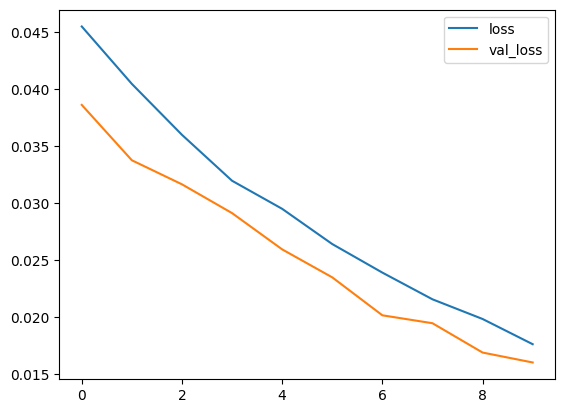

In [47]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

# 3. Make Predictions

In [48]:
input_text = vectorizer('You freaking suck! i am going to hurt you')

In [49]:
input_text

<tf.Tensor: shape=(1800,), dtype=int64, numpy=array([   7, 7158,  397, ...,    0,    0,    0])>

In [53]:
np.expand_dims(input_text, 0)

array([[   7, 7158,  397, ...,    0,    0,    0]])

In [56]:
batch = test.as_numpy_iterator().next()

In [58]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [63]:
res =model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 54ms/step


In [55]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [61]:
(model.predict(batch_X) > 0.5).astype(int)

1/1 [==============================] - 0s 68ms/step


array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [62]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

# 4. Evaluate Model

In [51]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [54]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [66]:
for batch in test.as_numpy_iterator():
  # Unpack the batch
  X_true, y_true = batch
  # make a prediction
  yhat = model.predict(X_true)

  #Flatten the predictions
  y_true = y_true.flatten()
  yhat= yhat.flatten()

  pre.update_state(y_true, yhat)
  re.update_state(y_true, yhat)
  acc.update_state(y_true, yhat)



1/1 [==============================] - 0s 74ms/step


In [67]:
print(f'Precision: {pre.result().numpy()}, Recall: {re.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.9282156229019165, Recall: 0.9051428437232971, Accuracy: 0.5295887589454651


#5. Test and Gradio

In [68]:
!pip install gradio jinja2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 50.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.7/286.7 kB 30.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 70.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 11.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 

In [69]:
import gradio as gr

In [70]:
model.save("toxicity.h5")

In [71]:
model = tf.keras.models.load_model("toxicity.h5")

In [77]:
input_str = vectorizer("hey i freakin hate you i am gonna hurt you")

In [78]:
res = model.predict(np.expand_dims(input_str,0))

1/1 [==============================] - 0s 52ms/step


In [79]:
res

array([[9.6933806e-01, 1.3334928e-04, 3.0426625e-03, 1.2630946e-04,
        4.2641163e-02, 2.7514005e-03]], dtype=float32)

In [80]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [82]:
def score_comment(comment):
  vectorized_comment = vectorizer([comment])
  results = model.predict(vectorized_comment)

  text = ''
  for idx, col in enumerate(df.columns[2:]):
    text+= '{}: {}\n'.format(col,results[0][idx]>0.5)

  return text

In [83]:
interface =gr.Interface(fn=score_comment,
                        inputs=gr.inputs.Textbox(lines=2, placeholder='Comment to score'),
                        outputs='text')

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `numeric` parameter is deprecated, and it has no effect
  warnings.warn(value)


In [84]:
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://88e7b5465bc15eed4b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades (NEW!), check out Spaces: https://huggingface.co/spaces
